In [277]:
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

In [278]:
from matplotlib import pyplot as plt
plt.ion()

In [279]:
Nsamples = 100
Nfeatures = 50

X = np.random.normal(size=(Nsamples, Nfeatures))
y = np.random.normal(size=Nsamples)

model = LinearRegression()
model.fit(X, y)
yp = model.predict(X)
R2 = pow(yp - y, 2).sum()
print(R2)

45.82904994781718


In [280]:
c = []
for x in X.transpose():
    c.append(pearsonr(x, y))
c = np.array(c)

Xs = X[:, c[:,1]>0.25]
model.fit(Xs, y)
yp = model.predict(Xs)
R2 = pow(yp - y, 2).sum()
R2

79.63740372385824

In [298]:
R2f = []
R2s = []
for i in range(100):
    X = np.random.normal(size=(Nsamples, Nfeatures))
    y = np.random.normal(size=Nsamples)

    model.fit(X, y)
    yp = model.predict(X)    
    R2f.append(pow(yp - y, 2).sum())
    
    c = []
    #for x in X.transpose():
    for i in range(Nfeatures):
        x = X[:,i]
        c.append(pearsonr(x, y))
    c = np.array(c)

    Xs = X[:, c[:,1]<0.25]
    model.fit(Xs, y)
    yp = model.predict(Xs)
    R2s.append(pow(yp - y, 2).sum())

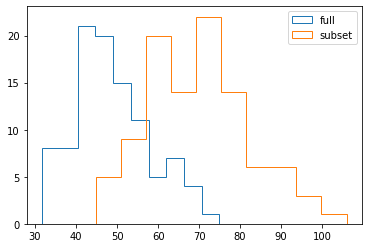

In [299]:
plt.hist(R2f, histtype='step', label='full')
plt.hist(R2s, histtype='step', label='subset')
plt.legend()